<a href="https://colab.research.google.com/github/sanhiitaa/feynnlabs-internship-2024/blob/main/T2-AI-product-service/heart_health_indicators_market_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

np.random.seed(999)

In [2]:
# loading the original dataset
df=pd.read_csv('/content/heart_disease_health_indicators_BRFSS2015.csv')
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [3]:
# loading the subset of the original data with random sampling
data=pd.read_csv('/content/health-dataset-new.csv')
data.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,27,0,0,0,0,0,...,1,0,3,0,30,1,0,13,3,2
1,0,0,1,1,31,0,0,0,1,0,...,1,0,3,0,4,0,1,10,6,8
2,0,1,0,0,26,0,0,0,1,0,...,1,0,2,0,5,0,0,9,3,4
3,0,1,1,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,9,6,5
4,0,0,1,1,31,1,1,0,1,1,...,1,0,4,20,30,0,0,5,5,3


In [4]:
# checking for duplicates
df.duplicated().sum()

23899

In [5]:
# dropping duplicates
df=df.drop_duplicates()

To streamline computational processes, the first task involved selecting features pertinent to demographic segmentation from the extensive dataset. Subsequently, a random sample consisting of 500 data points was drawn from this subset. This sampling process was conducted after scaling the data and applying Principal Component Analysis (PCA). By prioritizing the selection of features related to demographic segmentation before sampling, the aim was to ensure that only relevant information was retained. Following this, PCA was employed to reduce the dataset's dimensionality while preserving its intrinsic characteristics. This sequential approach aimed to maintain the dataset's underlying structure and patterns, even after reducing its size for more manageable analysis.

### **Demographic segmentation**

In [6]:
# demographic segmentation
demo_cols=['Sex', 'Age', 'Education', 'Income']
df2=df[demo_cols]

In [7]:
# scaling data

scale=StandardScaler()
scaledata=scale.fit_transform(df2)

In [8]:
# performing PCA to extract important relationships in the data and dimensionality reduction
pca=PCA()
pca.fit(scaledata)

pca_transformed_data= pca.transform(scaledata)

pca_df=pd.DataFrame(pca_transformed_data, columns=[f"PC{i}" for i in range(1, pca.n_components_ + 1)])

In [9]:
s=500
pca_df=pca_df.sample(n=s, replace=False)

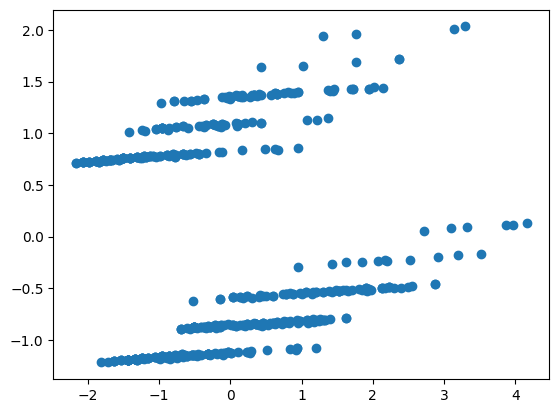

In [10]:
plt.scatter(pca_df.iloc[:,0], pca_df.iloc[:,1])

Best cluster number is: 7
Silhouette score for the best cluster number: 0.3173048573874872
{0: 0.2868723431892739, 1: 0.2958120917930163, 2: 0.3008471116462222, 3: 0.27290808593795735, 4: 0.2893908014312642, 5: 0.3010231781074607, 6: 0.3095579356492342, 7: 0.3173048573874872}


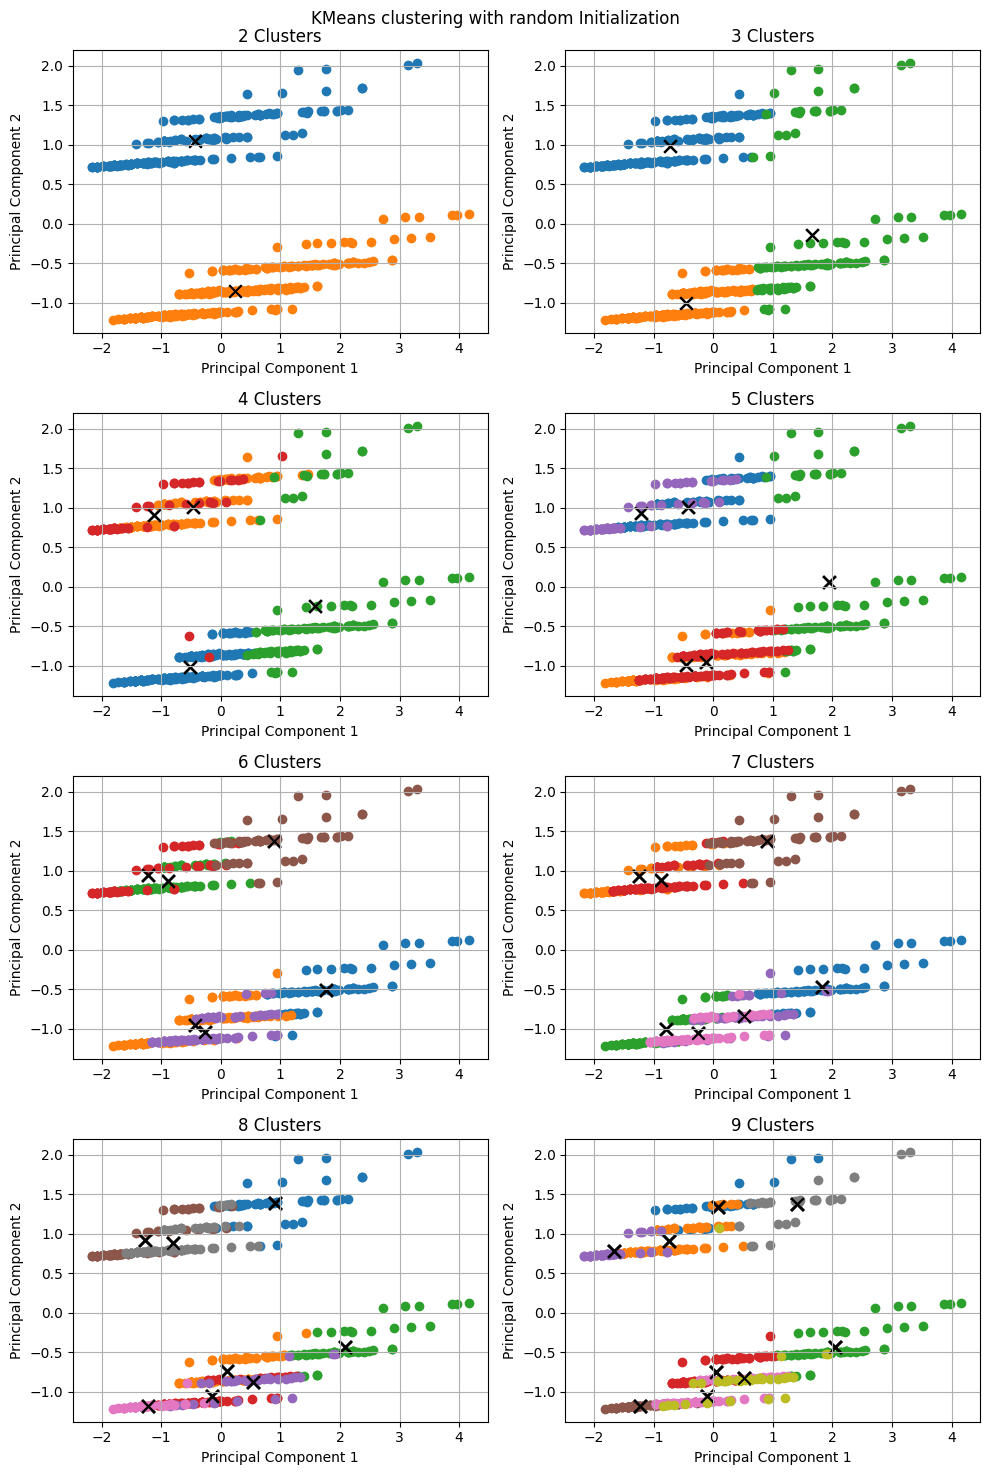

In [11]:
cluster_range = range(2, 10)  # Range of cluster numbers (2 to 9)
fig, axes = plt.subplots(4, 2, figsize=(10, 15))

# defining required parameters
best_silhouette_score=0
s_score={}

# initiating the loop for performing kmeans of different cluster sizes

for i, num_clusters in enumerate(cluster_range):

    # Perform kmeans clustering
    kmeans = KMeans(n_clusters=num_clusters, n_init='auto', init='random')
    labels = kmeans.fit_predict(pca_df)
    score=silhouette_score(pca_df, labels)
    s_score[i]= score

  # updating the best cluster values
    if score> best_silhouette_score:
      best_silhouette_score= score
      best_cluster_num= i

    # Get current subplot (axes is a 2D array)
    ax = axes.flat[i]


    for cluster_num in range(num_clusters):
        # plotting clusters
        cluster_data = pca_df[labels == cluster_num]
        ax.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {cluster_num + 1}')

        # plotting cluster centers
        ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='black', label='Cluster Centers', s=80)

    # Set labels and title for each subplot
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_title(f'{num_clusters} Clusters')
    ax.grid(True)

# print highest silhouette score with respective cluster number
print(f'Best cluster number is: {best_cluster_num}')
print(f'Silhouette score for the best cluster number: {best_silhouette_score}')
print(s_score)

# Tight layout to avoid overlapping titles
plt.suptitle('KMeans clustering with random Initialization')
plt.tight_layout()
plt.show()

2 clusters.

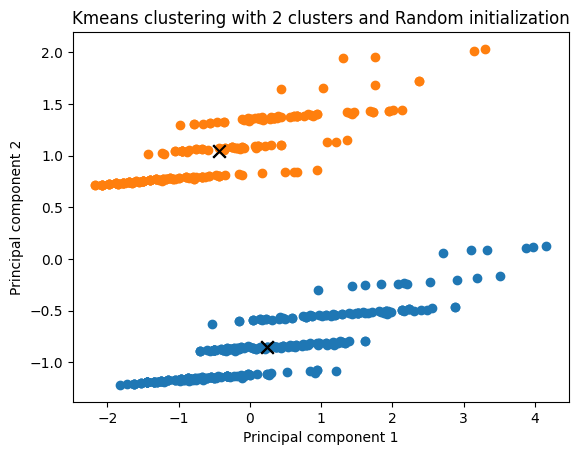

In [12]:
cluster_num=2

# performing kmeans with optimum cluster numbers
km=KMeans(n_clusters=cluster_num, init='random', n_init='auto')
labels=km.fit_predict(pca_df)
score=silhouette_score(pca_df, labels)

# plotting clusters
for i in range(cluster_num):
  cluster_data=pca_df[labels==i]
  plt.scatter(cluster_data.iloc[:,0], cluster_data.iloc[:,1], label=f'cluster{i+1}')

# plotting cluster centers
  plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker='x', color='black', label='cluster centers', s=80)

plt.title(f'Kmeans clustering with {cluster_num} clusters and Random initialization')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2');

In [13]:
# adding labels to the original dataset
data1=data
data1['label']=labels
data1.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,label
0,0,1,1,1,27,0,0,0,0,0,...,0,3,0,30,1,0,13,3,2,0
1,0,0,1,1,31,0,0,0,1,0,...,0,3,0,4,0,1,10,6,8,0
2,0,1,0,0,26,0,0,0,1,0,...,0,2,0,5,0,0,9,3,4,1
3,0,1,1,1,27,0,0,0,1,1,...,0,2,0,0,0,0,9,6,5,1
4,0,0,1,1,31,1,1,0,1,1,...,0,4,20,30,0,0,5,5,3,1


***Segment Characterization***

> **Moderate Risk, Active Lifestyle:**


1.   For Label 0, there is a relatively low prevalence of heart disease or heart attacks, high blood pressure, high cholesterol, stroke, and diabetes among individuals.

2.   For Label 0, there is a moderate prevalence of heavy alcohol consumption and smoking, with a relatively high level of physical activity. However, individuals report experiencing bad physical health for approximately 4.86 days within the past 30 days, alongside fair to moderate general health and mental health.


> **Higher Risk, Sedentary Lifestyle:**


1.   For Label 1, there is a slightly higher prevalence of heart disease or heart attacks, high blood pressure, high cholesterol, stroke, and diabetes compared to Label 0, indicating a potentially higher risk profile for these health conditions.

2.   For Label 1, there is a slightly higher prevalence of heavy alcohol consumption and smoking compared to Label 0, with slightly lower physical activity. Individuals report experiencing bad physical health for approximately 5.46 days within the past 30 days, alongside fair general health and moderate mental health.




> **For both Label 0 and Label 1, the demographic variables, including age, sex, education level, and income, exhibit similar predominant characteristics.**





Frequency of Health Conditions within each Label:
         HeartDiseaseorAttack    HighBP  HighChol    Stroke  Diabetes  \
Label 0              0.094915  0.410169  0.386441  0.054237  0.379661   
Label 1              0.097561  0.536585  0.468293  0.058537  0.390244   

         DiffWalk  
Label 0  0.162712  
Label 1  0.200000  


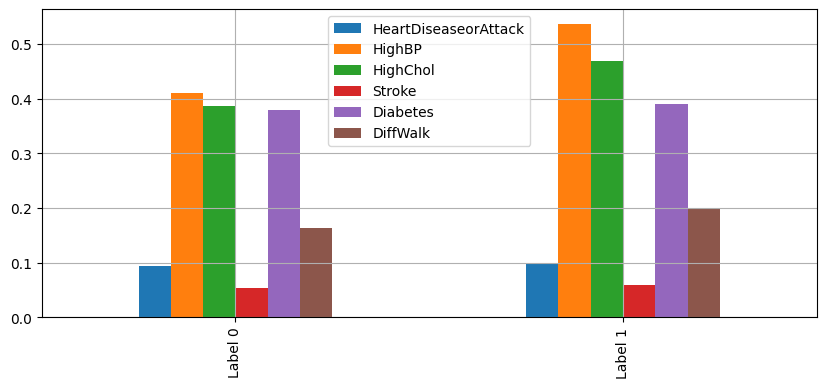

In [14]:
# defining conditions to check their frequency across the two labels
conditions = ['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'Stroke', 'Diabetes', 'DiffWalk' ]

# Calculate frequency of each condition within each label
frequency_df = data1.groupby('label')[conditions].mean()

# renaming label for clarity
frequency_df.index = ['Label 0', 'Label 1']

# visualizing the frequencies
frequency_df.plot(kind='bar', figsize=(10,4))
plt.grid()

# displaying the values of the frequencies
print("Frequency of Health Conditions within each Label:")
print(frequency_df)



Frequency of Overall health within each Label:
         HvyAlcoholConsump    Smoker  PhysActivity   GenHlth  MentHlth  \
Label 0           0.057627  0.454237      0.766102  2.613559  3.549153   
Label 1           0.078049  0.458537      0.692683  2.643902  3.868293   

         PhysHlth  
Label 0  4.864407  
Label 1  5.458537  


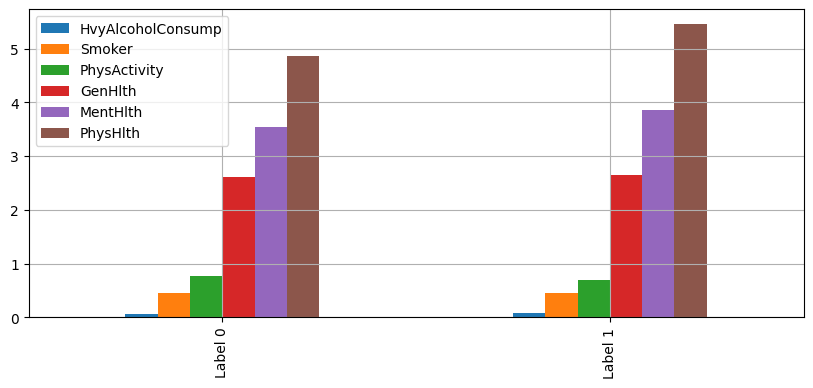

In [15]:
overall_health=['HvyAlcoholConsump','Smoker','PhysActivity','GenHlth', 'MentHlth', 'PhysHlth']

# grouping by labels
freq_df=data1.groupby('label')[overall_health].mean()

# renaming columns for clearity
freq_df.index=['Label 0', 'Label 1']

# visualizing
freq_df.plot(kind='bar', figsize=(10,4))

# displaying the values of the frequencies
print("Frequency of Overall health within each Label:")
print(freq_df)

plt.grid()

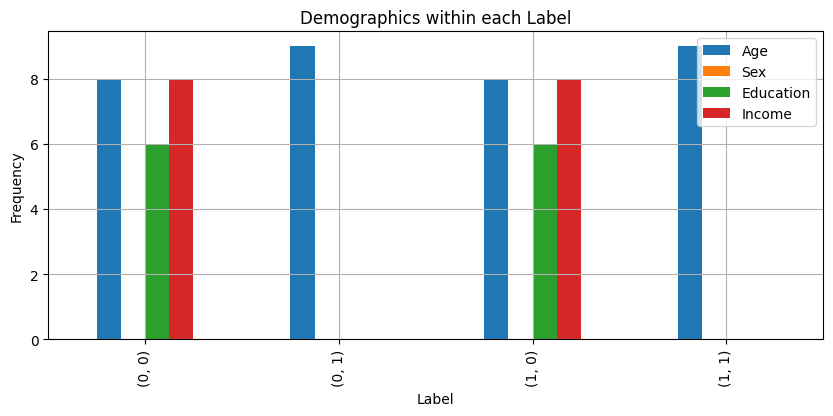

Demographics within each Label:
         Age  Sex  Education  Income
label                               
0     0    8  0.0        6.0     8.0
      1    9  NaN        NaN     NaN
1     0    8  0.0        6.0     8.0
      1    9  NaN        NaN     NaN


In [16]:
import matplotlib.pyplot as plt

# Define demographic variables
demograph = ['Age', 'Sex', 'Education', 'Income']

# Grouping by labels
freq_df = data1.groupby('label')[demograph].apply(lambda x: x.mode())

# Visualizing
freq_df.plot(kind='bar', figsize=(10, 4))
plt.title("Demographics within each Label")
plt.xlabel("Label")
plt.ylabel("Frequency")
plt.grid()
plt.show()

# Displaying the values of the frequencies
print("Demographics within each Label:")
print(freq_df)


### **Health Behavior Segmentation**

In [17]:
# selecting features for health behavior segmentation
health_behave_cols=['Smoker', 'HvyAlcoholConsump', 'PhysActivity']
df3=df[health_behave_cols]

In [18]:
# performing PCA to extract important relationships in the data and dimensionality reduction
from sklearn.decomposition import PCA

pca=PCA()
pca.fit(df3)

pca_transformed_data= pca.transform(df3)

pca_df=pd.DataFrame(pca_transformed_data, columns=[f"PC{i}" for i in range(1, pca.n_components_ + 1)])

In [19]:
# random sampling data
s=500
pca_df=pca_df.sample(n=s, replace=False, random_state=999)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


Best cluster number is: 6
Silhouette score for the best cluster number: 0.9979999994942378
{0: 0.6125515193815466, 1: 0.713215927923771, 2: 0.8945631472654734, 3: 0.9062695787834425, 4: 0.9435339800767619, 5: 0.9959999994942378, 6: 0.9979999994942378, 7: 0.9979999994942378}


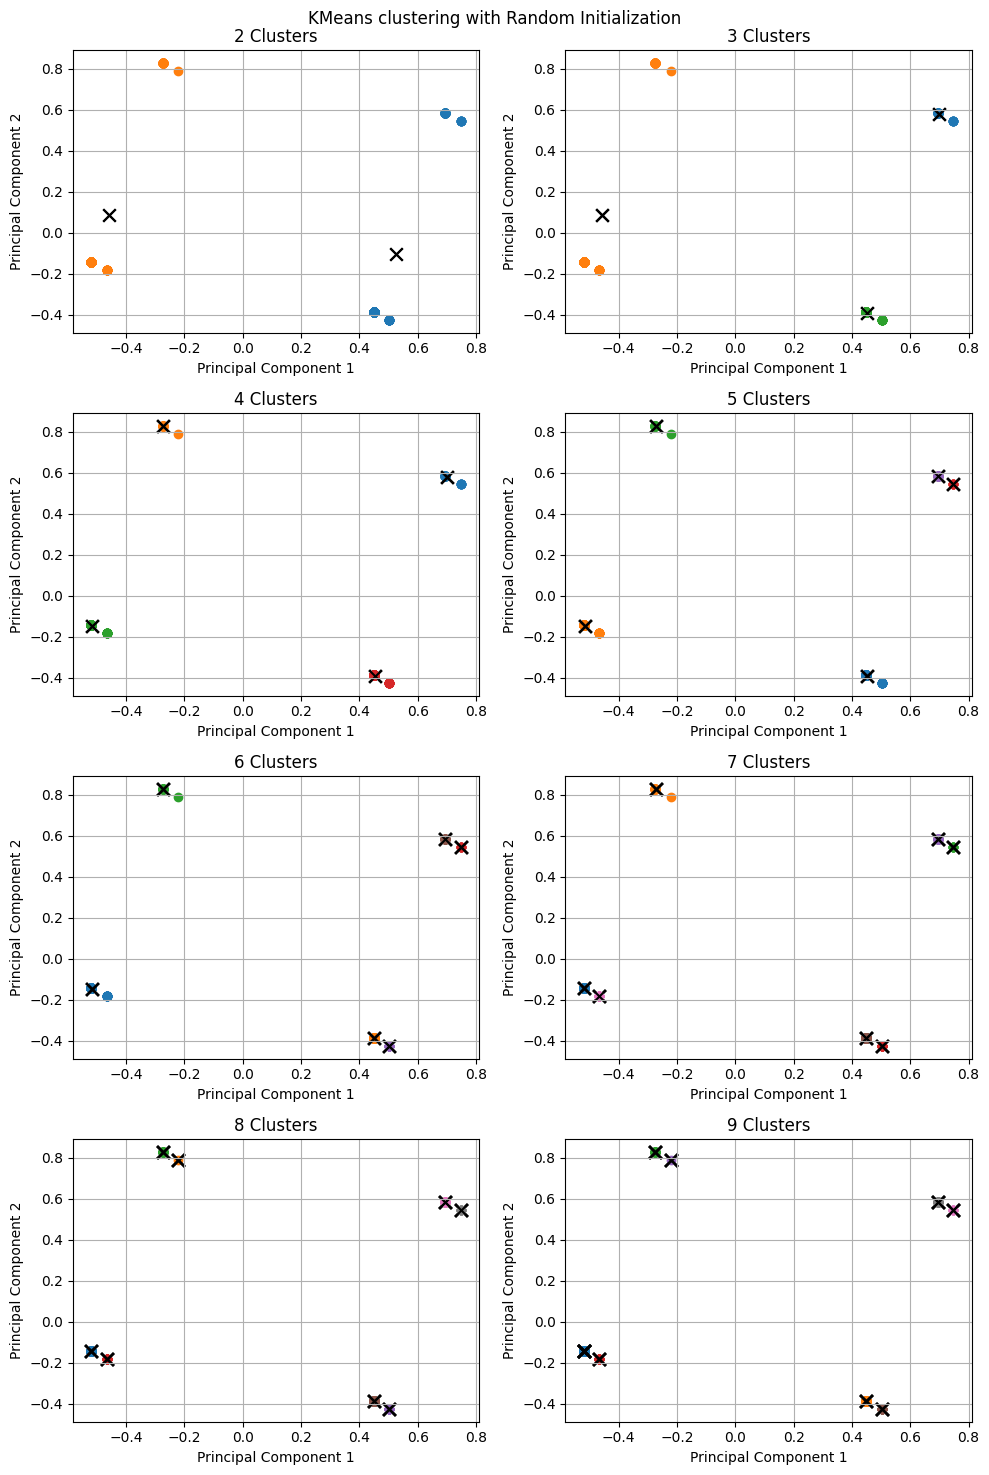

In [20]:
cluster_range = range(2, 10)  # Range of cluster numbers (2 to 9)
fig, axes = plt.subplots(4, 2, figsize=(10, 15))

# defining required parameters
s_score={}
best_silhouette_score=0

# initiating loop for kmeans clustering over different cluster numbers.
for i, num_clusters in enumerate(cluster_range):

    # Perform kmeans clustering
    kmeans = KMeans(n_clusters=num_clusters, n_init='auto', init='random')
    labels = kmeans.fit_predict(pca_df)
    score=silhouette_score(pca_df, labels)
    s_score[i]= score

  # updating the best cluster values
    if score> best_silhouette_score:
      best_silhouette_score= score
      best_cluster_num= i

    # Get current subplot (axes is a 2D array)
    ax = axes.flat[i]

    for cluster_num in range(num_clusters):
        # plotting clusters
        cluster_data = pca_df[labels == cluster_num]
        ax.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {cluster_num + 1}')

        # plotting cluster centers
        ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='black', label='Cluster Centers', s=80)

    # Set labels and title for each subplot
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_title(f'{num_clusters} Clusters')
    ax.grid(True)

# print highest silhouette score with respective cluster number
print(f'Best cluster number is: {best_cluster_num}')
print(f'Silhouette score for the best cluster number: {best_silhouette_score}')
print(s_score)

# Tight layout to avoid overlapping titles
plt.suptitle('KMeans clustering with Random Initialization')
plt.tight_layout()
plt.show()

4 clusters.

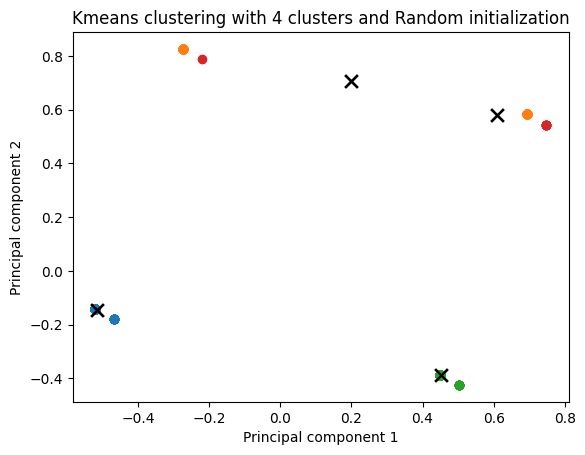

In [21]:
cluster_num=4

# performing kmeans with optimum cluster numbers
km=KMeans(n_clusters=cluster_num, init='random', n_init='auto')
labels=km.fit_predict(pca_df)
score=silhouette_score(pca_df, labels)

# plotting clusters
for i in range(cluster_num):
  cluster_data=pca_df[labels==i]
  plt.scatter(cluster_data.iloc[:,0], cluster_data.iloc[:,1], label=f'cluster{i+1}')

# plotting cluster centers
  plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker='x', color='black', label='cluster centers', s=80)

plt.title(f'Kmeans clustering with {cluster_num} clusters and Random initialization')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2');

***Segment Characterization***

In [22]:
# merging labels back in the original dataset for analysis
data2=data
data2['label']=labels
data1.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,label
0,0,1,1,1,27,0,0,0,0,0,...,0,3,0,30,1,0,13,3,2,1
1,0,0,1,1,31,0,0,0,1,0,...,0,3,0,4,0,1,10,6,8,0
2,0,1,0,0,26,0,0,0,1,0,...,0,2,0,5,0,0,9,3,4,1
3,0,1,1,1,27,0,0,0,1,1,...,0,2,0,0,0,0,9,6,5,0
4,0,0,1,1,31,1,1,0,1,1,...,0,4,20,30,0,0,5,5,3,1


Frequency of Health Conditions within each Label:
         HeartDiseaseorAttack    HighBP  HighChol    Stroke  Diabetes  \
Label 0              0.106280  0.454106  0.478261  0.048309  0.454106   
Label 1              0.088000  0.432000  0.352000  0.064000  0.384000   
Label 2              0.074534  0.490683  0.391304  0.062112  0.285714   
Label 3              0.428571  0.571429  0.571429  0.000000  0.571429   

         DiffWalk  
Label 0  0.178744  
Label 1  0.152000  
Label 2  0.198758  
Label 3  0.142857  


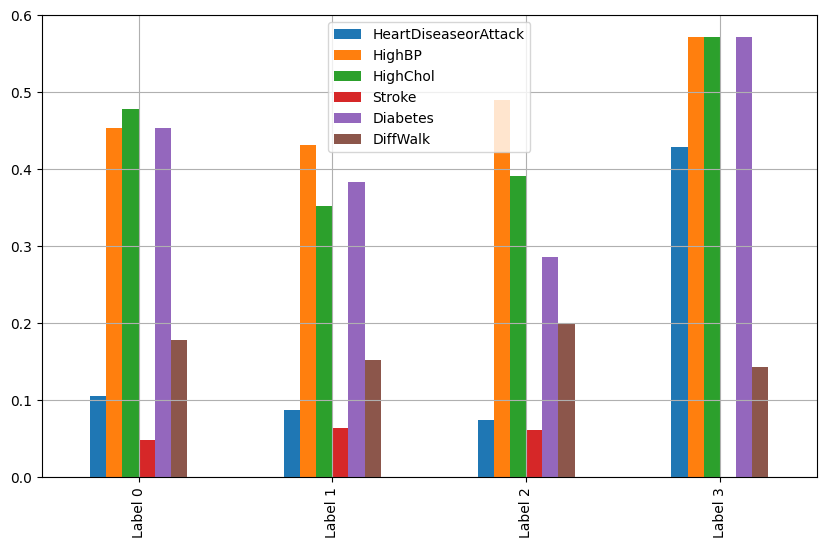

In [23]:
# defining conditions to check their frequency across the two labels
conditions = ['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'Stroke', 'Diabetes', 'DiffWalk' ]

# Calculate frequency of each condition within each label
frequency_df = data2.groupby('label')[conditions].mean()

# renaming label for clarity
frequency_df.index = ['Label 0', 'Label 1', 'Label 2', 'Label 3']

# visualizing the frequencies
frequency_df.plot(kind='bar', figsize=(10,6))
plt.grid()

# displaying the values of the frequencies
print("Frequency of Health Conditions within each Label:")
print(frequency_df)



Frequency of Overall health within each Label:
         HvyAlcoholConsump    Smoker  PhysActivity   GenHlth  MentHlth  \
Label 0           0.043478  0.405797      0.729469  2.618357  4.000000   
Label 1           0.064000  0.496000      0.712000  2.560000  3.104000   
Label 2           0.099379  0.490683      0.782609  2.658385  3.577640   
Label 3           0.000000  0.428571      0.285714  3.285714  6.857143   

         PhysHlth  
Label 0  5.193237  
Label 1  4.888000  
Label 2  4.975155  
Label 3  9.571429  


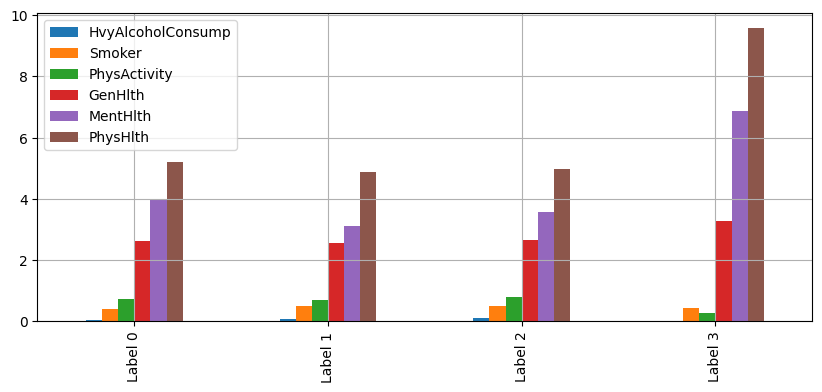

In [24]:
overall_health=['HvyAlcoholConsump','Smoker','PhysActivity','GenHlth', 'MentHlth', 'PhysHlth']

# grouping by labels
freq_df=data2.groupby('label')[overall_health].mean()

# renaming columns for clearity
freq_df.index=['Label 0', 'Label 1','Label 2', 'Label 3']

# visualizing
freq_df.plot(kind='bar', figsize=(10,4))

# displaying the values of the frequencies
print("Frequency of Overall health within each Label:")
print(freq_df)

plt.grid()

**Label 0 (Low Risk)**:


1.   This group has a moderate prevalence of high blood pressure, high cholesterol, and diabetes, with a low occurrence of heart disease or heart attacks and strokes. Additionally, individuals report experiencing some difficulties in walking.
2.   Individuals in this group have a relatively low prevalence of heavy alcohol consumption and smoking, along with a moderate level of physical activity. They report fair to moderate general health and mental health, with approximately 5.19 days of bad physical health within the past 30 days.




**Label 1 (Moderate Risk)**:


1.   Individuals in this group exhibit a lower prevalence of heart disease or heart attacks, high blood pressure, high cholesterol, and diabetes compared to Label 0, but strokes occur slightly more frequently. Some individuals also report facing difficulties in walking.
2.    This group exhibits a slightly higher prevalence of heavy alcohol consumption and smoking compared to Label 0, with similar levels of physical activity. General health and mental health are slightly lower, and individuals report approximately 4.89 days of bad physical health within the past 30 days.



**Label 2 (High Risk)**:


1.   There is a moderate prevalence of heart disease or heart attacks, high blood pressure, and high cholesterol, with a slightly lower occurrence of diabetes. The incidence of strokes is moderate, and individuals report experiencing difficulties in walking.
2.   There is a higher prevalence of heavy alcohol consumption compared to Labels 0 and 1, along with similar levels of smoking and physical activity. Individuals report fair to moderate general health and mental health, with approximately 4.98 days of bad physical health within the past 30 days.

**Label 3 (Very High Risk)**:


1.   This group presents a significantly elevated risk profile for cardiovascular diseases, with a high prevalence of heart disease or heart attacks, high blood pressure, high cholesterol, and diabetes. Strokes are infrequent, but individuals report considerable difficulties in walking.
2.   Individuals in this group report the lowest level of physical activity among all labels, alongside the lowest prevalence of heavy alcohol consumption and smoking. However, they report the highest levels of bad physical health within the past 30 days, indicating significant health challenges.




### **Health Status Segmentation**

In [25]:
# selecting features for  Health Status Segmentation
cols=['GenHlth', 'MentHlth', 'PhysHlth']
df4=df[cols]

In [26]:
# scaling data
scale=StandardScaler()
scaledata=scale.fit_transform(df4)

In [27]:
# performing PCA to extract important relationships in the data
pca=PCA()
pca.fit(scaledata)

pca_transformed_data= pca.transform(scaledata)

pca_df=pd.DataFrame(pca_transformed_data, columns=[f"PC{i}" for i in range(1, pca.n_components_ + 1)])

In [28]:
# random samplingn data
s=500
pca_df=pca_df.sample(n=s, replace=False, random_state=999)

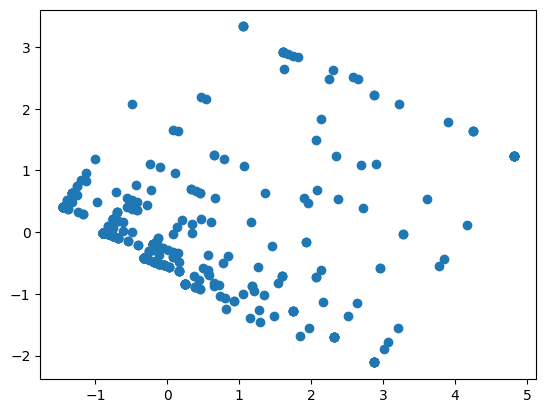

In [29]:
# visualizing
plt.scatter(pca_df.iloc[:,0], pca_df.iloc[:,1])

Best cluster number is: 7
Silhouette score for the best cluster number: 0.6038640906914131
{0: 0.5948696750391048, 1: 0.5872617148997298, 2: 0.5235228493212888, 3: 0.5398725077921898, 4: 0.5615241555987417, 5: 0.5734320936414116, 6: 0.5987512522938017, 7: 0.6038640906914131}


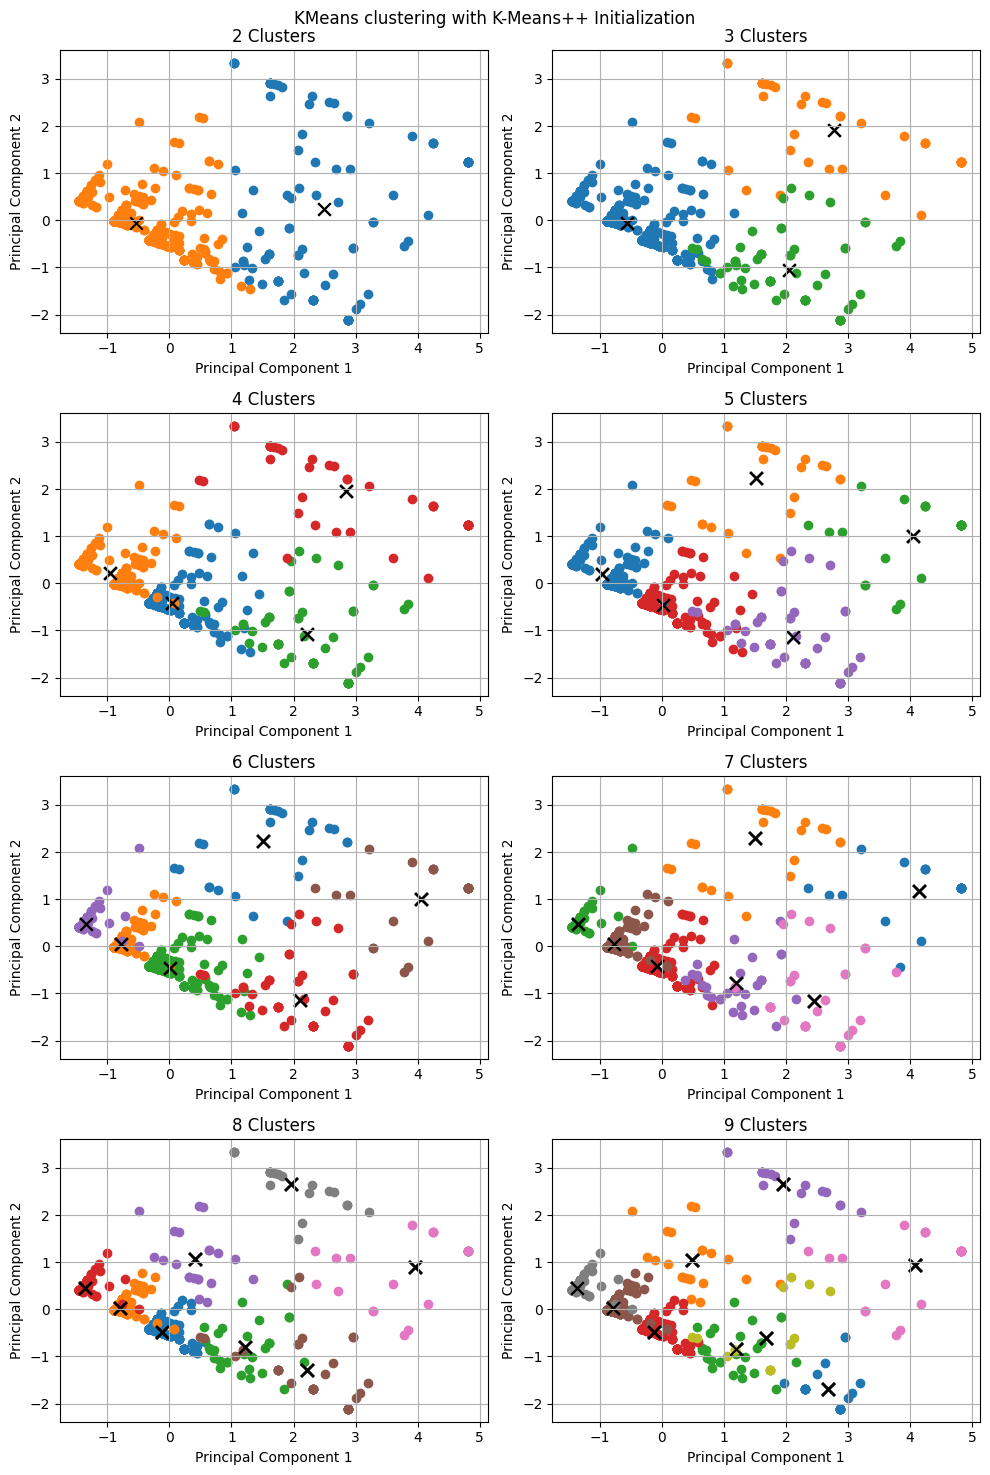

In [30]:
cluster_range = range(2, 10)  # Range of cluster numbers (2 to 9)
fig, axes = plt.subplots(4, 2, figsize=(10, 15))

# defining required parameters
best_silhouette_score=0
s_score={}

# initializing loop to perform kmeans clustering over different cluster numbers
for i, num_clusters in enumerate(cluster_range):
    # Perform kmeans clustering
    kmeans = KMeans(n_clusters=num_clusters, n_init='auto', init='random')
    labels = kmeans.fit_predict(pca_df)
    score=silhouette_score(pca_df, labels)
    s_score[i]= score

  # updating the best cluster values
    if score> best_silhouette_score:
      best_silhouette_score= score
      best_cluster_num= i

    # Get current subplot (axes is a 2D array)
    ax = axes.flat[i]

    for cluster_num in range(num_clusters):
      # plotting clusters
        cluster_data = pca_df[labels == cluster_num]
        ax.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {cluster_num + 1}')

        # plotting cluster centers
        ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='black', label='Cluster Centers', s=80)

    # Set labels and title for each subplot
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_title(f'{num_clusters} Clusters')
    ax.grid(True)

# print highest silhouette score with respective cluster number
print(f'Best cluster number is: {best_cluster_num}')
print(f'Silhouette score for the best cluster number: {best_silhouette_score}')
print(s_score)

# Tight layout to avoid overlapping titles
plt.suptitle('KMeans clustering with K-Means++ Initialization')
plt.tight_layout()
plt.show()

2 clusters.

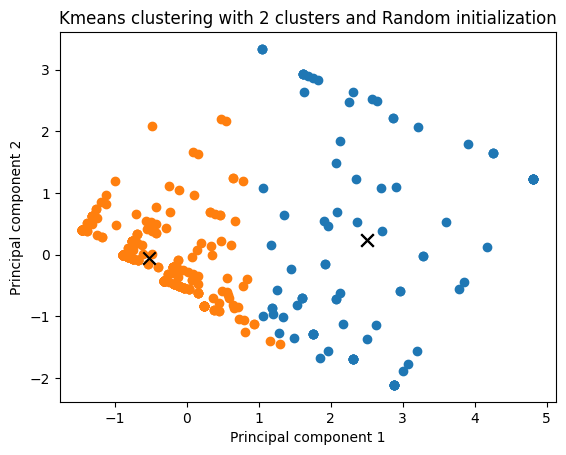

In [31]:
cluster_num=2

# performing kmeans with optimum cluster numbers
km=KMeans(n_clusters=cluster_num, init='random', n_init='auto')
labels=km.fit_predict(pca_df)
score=silhouette_score(pca_df, labels)

# plotting clusters
for i in range(cluster_num):
  cluster_data=pca_df[labels==i]
  plt.scatter(cluster_data.iloc[:,0], cluster_data.iloc[:,1], label=f'cluster{i+1}')

# plotting cluster centers
  plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker='x', color='black', label='cluster centers', s=80)

plt.title(f'Kmeans clustering with {cluster_num} clusters and Random initialization')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2');

In [32]:
# merging labels back in the original dataset for analysis
data3=data
data3['label']=labels
data3.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,label
0,0,1,1,1,27,0,0,0,0,0,...,0,3,0,30,1,0,13,3,2,1
1,0,0,1,1,31,0,0,0,1,0,...,0,3,0,4,0,1,10,6,8,1
2,0,1,0,0,26,0,0,0,1,0,...,0,2,0,5,0,0,9,3,4,1
3,0,1,1,1,27,0,0,0,1,1,...,0,2,0,0,0,0,9,6,5,1
4,0,0,1,1,31,1,1,0,1,1,...,0,4,20,30,0,0,5,5,3,1


Frequency of Health Conditions within each Label:
         HeartDiseaseorAttack    HighBP  HighChol    Stroke  Diabetes  \
Label 0              0.134021  0.505155  0.391753  0.072165  0.360825   
Label 1              0.086849  0.451613  0.426799  0.052109  0.389578   

         DiffWalk  
Label 0  0.154639  
Label 1  0.183623  


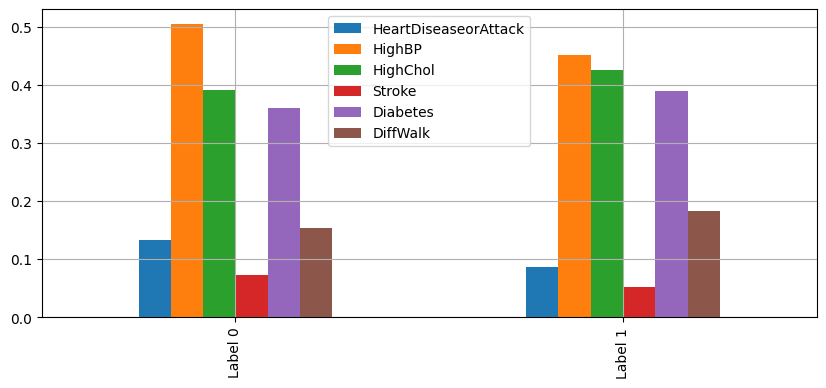

In [33]:
# defining conditions to check their frequency across the two labels
conditions = ['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'Stroke', 'Diabetes', 'DiffWalk' ]

# Calculate frequency of each condition within each label
frequency_df = data3.groupby('label')[conditions].mean()

# renaming label for clarity
frequency_df.index = ['Label 0', 'Label 1']

# visualizing the frequencies
frequency_df.plot(kind='bar', figsize=(10,4))
plt.grid()

# displaying the values of the frequencies
print("Frequency of Health Conditions within each Label:")
print(frequency_df)


Frequency of Overall health within each Label:
         HvyAlcoholConsump    Smoker  PhysActivity   GenHlth  MentHlth  \
Label 0           0.082474  0.505155      0.731959  2.639175  2.824742   
Label 1           0.062035  0.444169      0.736973  2.622829  3.885856   

         PhysHlth  
Label 0  4.855670  
Label 1  5.168734  


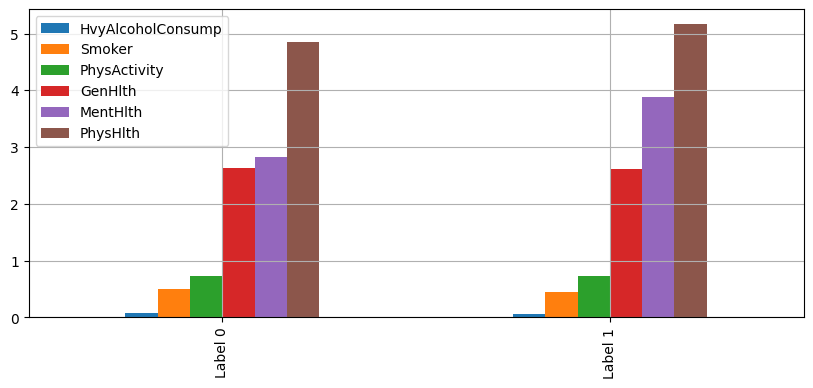

In [34]:
overall_health=['HvyAlcoholConsump','Smoker','PhysActivity','GenHlth', 'MentHlth', 'PhysHlth']

# grouping by labels
freq_df=data1.groupby('label')[overall_health].mean()

# renaming columns for clearity
freq_df.index=['Label 0', 'Label 1']

# visualizing
freq_df.plot(kind='bar', figsize=(10,4))

# displaying the values of the frequencies
print("Frequency of Overall health within each Label:")
print(freq_df)

plt.grid()

Moderate Risk, Active Lifestyle (Label 0):
1. Health Conditions: Individuals in Cluster 0 have a higher prevalence of heart disease or heart attacks, high blood pressure, and strokes compared to Cluster 1. However, they have a lower prevalence of high cholesterol and diabetes. They also report experiencing moderate difficulty in walking.
2. Overall Health: Individuals in Cluster 0 exhibit a higher prevalence of heavy alcohol consumption and smoking compared to Cluster 1. Despite having slightly lower levels of physical activity, they report fair to moderate general health and mental health. However, they experience bad physical health for approximately 4.86 days within the past 30 days.

Low Risk, Sedentary Lifestyle (Label 1):
1. Health Conditions: Individuals in Cluster 1 have a lower prevalence of heart disease or heart attacks, high blood pressure, strokes, and diabetes compared to Cluster 0. However, they exhibit a slightly higher prevalence of high cholesterol. They also report experiencing some difficulty in walking.
2. Overall Health: Individuals in Cluster 1 have a lower prevalence of heavy alcohol consumption and smoking compared to Cluster 0. They exhibit similar levels of physical activity but report slightly better general health and mental health. They experience bad physical health for approximately 5.17 days within the past 30 days.

### **Prevalent Health Condition Segmentaion**

In [35]:
# selecting features for the respective segmentation
cols=['HighBP', 'HighChol', 'Diabetes']
df5=df[cols]

In [36]:
# scaling data
scale=StandardScaler()
scaledata=scale.fit_transform(df5)

In [37]:
# performing PCA to extract important relationships in the data
pca=PCA()
pca.fit(scaledata)

pca_transformed_data= pca.transform(scaledata)

pca_df=pd.DataFrame(pca_transformed_data, columns=[f"PC{i}" for i in range(1, pca.n_components_ + 1)])

In [38]:
# random sampling
s=500
pca_df=pca_df.sample(n=s, replace=False, random_state=999)

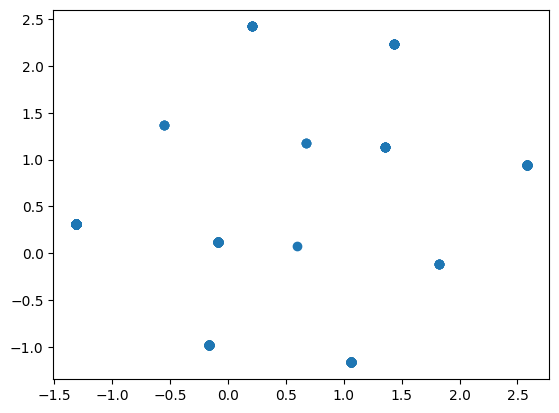

In [39]:
# visulaization
plt.scatter(pca_df.iloc[:,0], pca_df.iloc[:,1])

Best cluster number is: 7
Silhouette score for the best cluster number: 0.9735315239417999
{0: 0.4926739136585261, 1: 0.6039557058468203, 2: 0.7516821856660229, 3: 0.8782029564941305, 4: 0.9114901100923813, 5: 0.9340962619582515, 6: 0.954535517987004, 7: 0.9735315239417999}


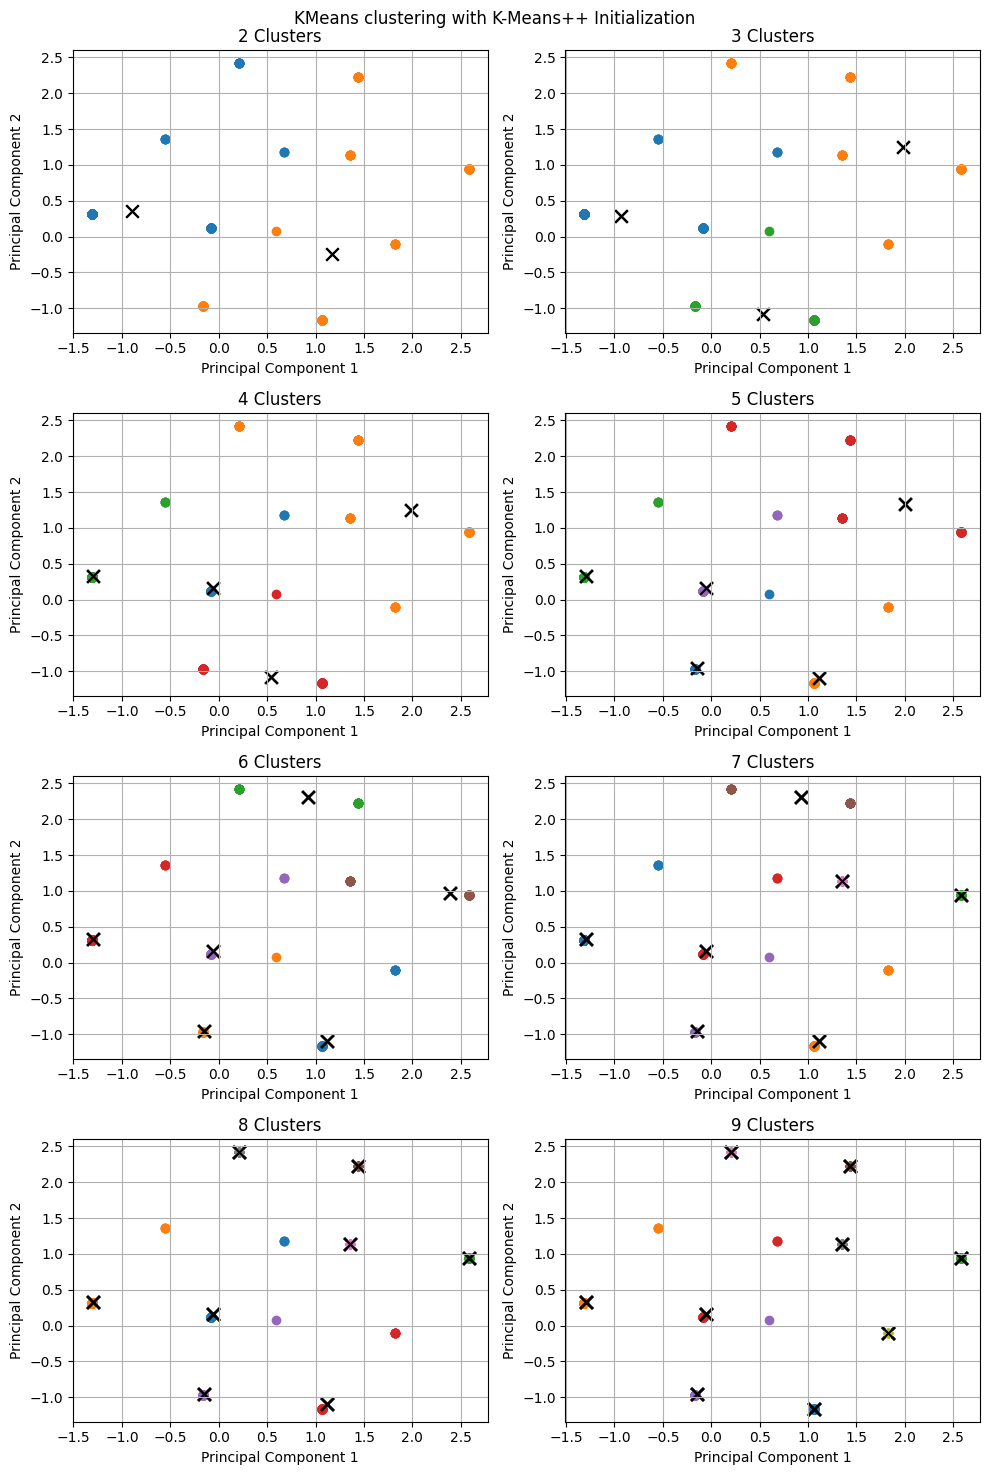

In [40]:
cluster_range = range(2, 10)  # Range of cluster numbers (2 to 9)
fig, axes = plt.subplots(4, 2, figsize=(10, 15))

# defining parameters
best_silhouette_score=0
s_score={}

# initializing the loop to perform and visualize kmeans over different cluster numbers.
for i, num_clusters in enumerate(cluster_range):

    # Perform kmeans clustering
    kmeans = KMeans(n_clusters=num_clusters, n_init='auto', init='k-means++')
    labels = kmeans.fit_predict(pca_df)
    score=silhouette_score(pca_df, labels)
    s_score[i]= score

  # updating the best cluster values
    if score> best_silhouette_score:
      best_silhouette_score= score
      best_cluster_num= i

    # Get current subplot (axes is a 2D array)
    ax = axes.flat[i]

    for cluster_num in range(num_clusters):

        # plotting clusters
        cluster_data = pca_df[labels == cluster_num]
        ax.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {cluster_num + 1}')

        # plotting cluster centers
        ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='black', label='Cluster Centers', s=80)

    # Set labels and title for each subplot
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_title(f'{num_clusters} Clusters')
    ax.grid(True)

# print highest silhouette score with respective cluster number
print(f'Best cluster number is: {best_cluster_num}')
print(f'Silhouette score for the best cluster number: {best_silhouette_score}')
print(s_score)

# Tight layout to avoid overlapping titles
plt.suptitle('KMeans clustering with K-Means++ Initialization')
plt.tight_layout()
plt.show()

3 clusters.


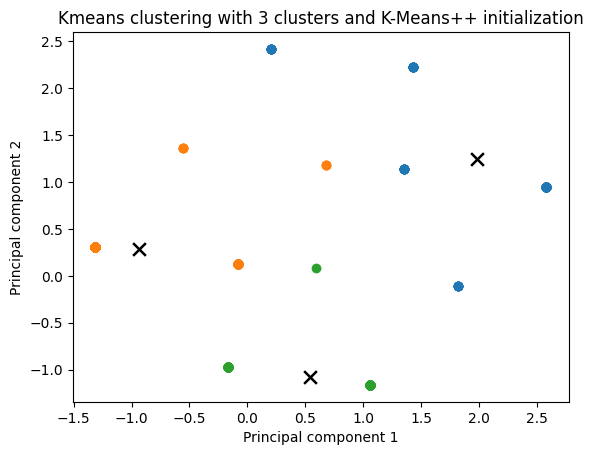

In [41]:
cluster_num=3

# performing kmeans with optimum cluster numbers
km=KMeans(n_clusters=cluster_num, init='k-means++', n_init='auto')
labels=km.fit_predict(pca_df)
score=silhouette_score(pca_df, labels)

# plotting clusters
for i in range(cluster_num):
  cluster_data=pca_df[labels==i]
  plt.scatter(cluster_data.iloc[:,0], cluster_data.iloc[:,1], label=f'cluster{i+1}')

# plotting cluster centers
  plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker='x', color='black', label='cluster centers', s=80)

plt.title(f'Kmeans clustering with {cluster_num} clusters and K-Means++ initialization')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2');


In [42]:
# merging labels back in the original dataset for analysis
data4=data
data4['label']=labels
data4.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,label
0,0,1,1,1,27,0,0,0,0,0,...,0,3,0,30,1,0,13,3,2,1
1,0,0,1,1,31,0,0,0,1,0,...,0,3,0,4,0,1,10,6,8,0
2,0,1,0,0,26,0,0,0,1,0,...,0,2,0,5,0,0,9,3,4,0
3,0,1,1,1,27,0,0,0,1,1,...,0,2,0,0,0,0,9,6,5,1
4,0,0,1,1,31,1,1,0,1,1,...,0,4,20,30,0,0,5,5,3,1


Frequency of Health Conditions within each Label:
         HeartDiseaseorAttack    HighBP  HighChol    Stroke  Diabetes  \
Label 0              0.084211  0.389474  0.410526  0.021053  0.357895   
Label 1              0.090226  0.458647  0.417293  0.067669  0.383459   
Label 2              0.115108  0.517986  0.431655  0.057554  0.402878   

         DiffWalk  
Label 0  0.157895  
Label 1  0.191729  
Label 2  0.165468  


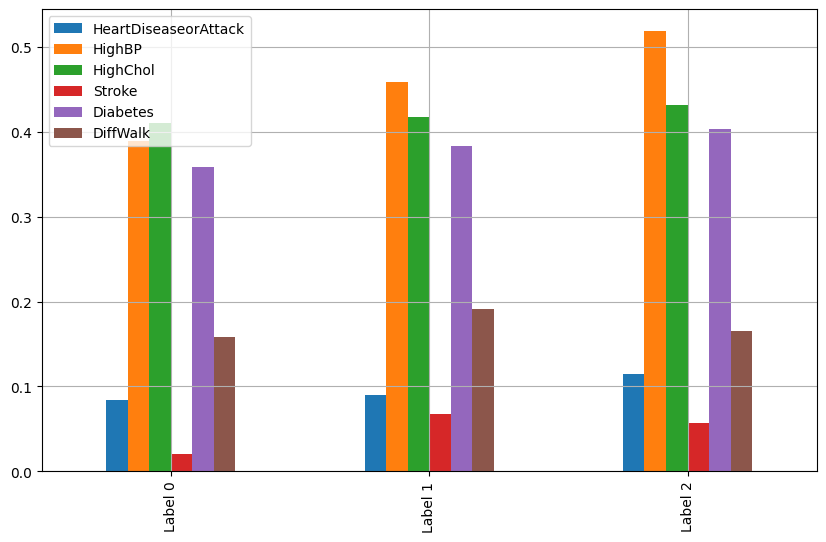

In [43]:
# defining conditions to check their frequency across the two labels
conditions = ['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'Stroke', 'Diabetes', 'DiffWalk' ]

# Calculate frequency of each condition within each label
frequency_df = data4.groupby('label')[conditions].mean()

# renaming label for clarity
frequency_df.index = ['Label 0', 'Label 1', 'Label 2']

# visualizing the frequencies
frequency_df.plot(kind='bar', figsize=(10,6))
plt.grid()

# displaying the values of the frequencies
print("Frequency of Health Conditions within each Label:")
print(frequency_df)



Frequency of Overall health within each Label:
         HvyAlcoholConsump    Smoker  PhysActivity   GenHlth  MentHlth  \
Label 0           0.094737  0.431579      0.726316  2.600000  3.957895   
Label 1           0.052632  0.458647      0.729323  2.669173  4.075188   
Label 2           0.071942  0.467626      0.755396  2.561151  2.733813   

         PhysHlth  
Label 0  4.673684  
Label 1  5.315789  
Label 2  5.007194  


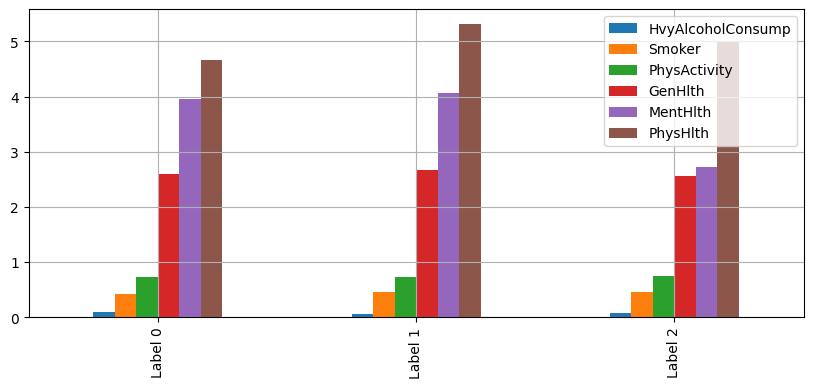

In [44]:
overall_health=['HvyAlcoholConsump','Smoker','PhysActivity','GenHlth', 'MentHlth', 'PhysHlth']

# grouping by labels
freq_df=data4.groupby('label')[overall_health].mean()

# renaming columns for clearity
freq_df.index=['Label 0', 'Label 1', 'Label 2']

# visualizing
freq_df.plot(kind='bar', figsize=(10,4))

# displaying the values of the frequencies
print("Frequency of Overall health within each Label:")
print(freq_df)

plt.grid()

Moderate Risk, Sedentary Lifestyle (Cluster 0):
1. Moderate prevalence of cardiovascular risk factors, including heart disease, high blood pressure, high cholesterol, and diabetes.
2. Individuals in this cluster report relatively lower levels of physical activity and fair to moderate overall health.

Low Risk, Active Lifestyle (Cluster 1):
1. Lower prevalence of cardiovascular risk factors compared to Cluster 0, with slightly lower incidences of heart disease, high blood pressure, high cholesterol, and diabetes.
2. Individuals in this cluster exhibit similar levels of physical activity compared to Cluster 2 and report fair to moderate overall health.

High Risk, Active Lifestyle (Cluster 2):
1. Higher prevalence of cardiovascular risk factors compared to Cluster 0, with similar levels of incidence for heart disease, high blood pressure, high cholesterol, and diabetes.
2. Individuals in this cluster report higher levels of physical activity compared to Cluster 0 and fair overall health.